In [1]:
import numpy as np
import pandas as pd

In [2]:
from evaluator import Evaluator

## Generate TestData

In [3]:
# Generate data
np.random.seed(0)
n_samples_1 = 100
n_samples_2 = 50
data_1 = np.random.normal(loc=0.25, scale=0.2, size=n_samples_1)
data_2 = np.random.normal(loc=0.75, scale=0.2, size=n_samples_2)

# Labels (0 for the first distribution, 1 for the second)
labels_1 = np.zeros(n_samples_1, dtype=int)
labels_2 = np.ones(n_samples_2, dtype=int)

# Combine the data
preds = np.concatenate([data_1, data_2])
labels = np.concatenate([labels_1, labels_2])

# Threshold for predictions
threshold = 0.5

# Create & Shuffle dataFrame
df = pd.DataFrame({'pred': preds, 'label': labels})
df['pred_label'] = (df['pred'] >= threshold).astype(int)
df = df.sample(frac=1).reset_index(drop=True)

## Create Evaluator

In [4]:
evaluator = Evaluator(df, threshold)

## Show Figures

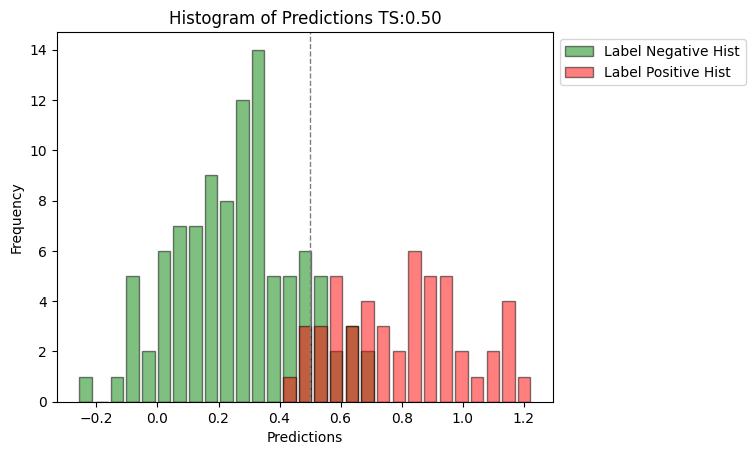

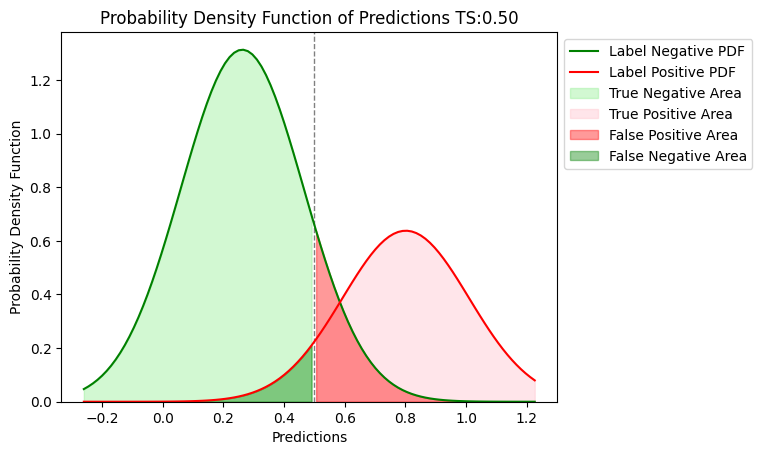

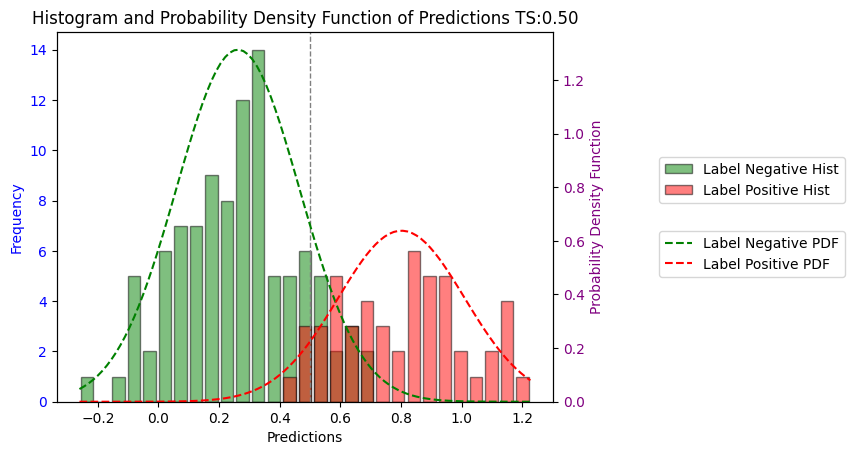

In [5]:
# Now you can use the evaluator to show the plots
evaluator.show_hist()
evaluator.show_pdf()
evaluator.show_hist_and_pdf()

## Show Tables

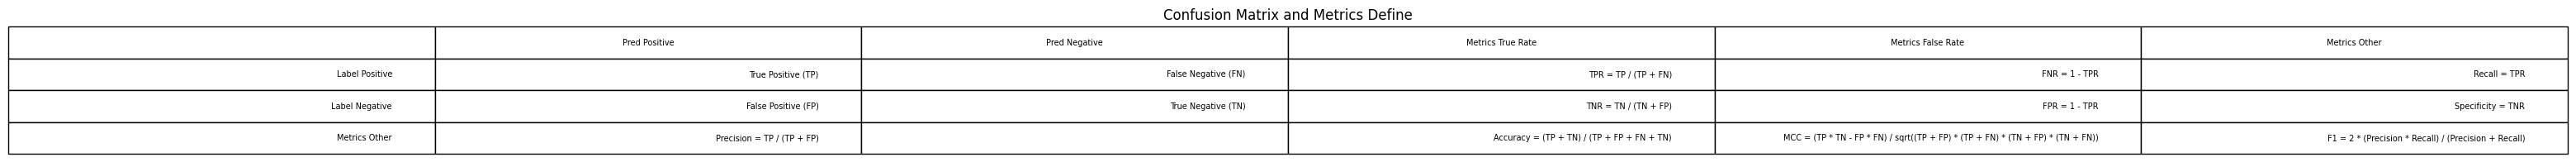

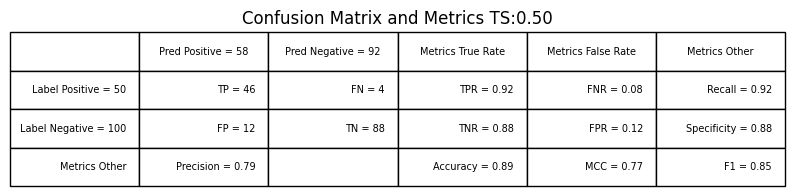

In [6]:
evaluator.show_confusion_matrix_and_metrics_define()
evaluator.show_confusion_matrix_and_metrics()